In [1]:
import sys
import os 
# add path of src folder to system
sys.path.append(os.path.abspath(os.path.join('../')))

In [2]:
import matplotlib.pyplot as plt
from src.data.brain_mri_dataset import BrainMRI

/home/mamur/miniconda3/envs/adlm/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2023-11-16 03:23:36.475459: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-16 03:23:36.475486: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-16 03:23:36.475508: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-16 03:23:36.481653: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow

In [3]:
from src.data.brain_mri_lightning import BrainMriLightning

In [4]:
def visualize_dataset(dataset, num_images=1):
    for i in range(num_images):
        data = dataset[i]
        if isinstance(data, tuple) and len(data) == 3:  # for 'test' mode
            img, pos_mask, neg_mask = data
            fig, ax = plt.subplots(1, 3, figsize=(12, 4))
            ax[0].imshow(img.squeeze(), cmap='gray')
            ax[0].set_title('Image')
            ax[1].imshow(pos_mask.squeeze(), cmap='gray')
            ax[1].set_title('Positive Mask')
            ax[2].imshow(neg_mask.squeeze(), cmap='gray')
            ax[2].set_title('Negative Mask')
            plt.show()
        else:  # for 'train' or 'val' mode
            img = data
            plt.imshow(img.squeeze(), cmap='gray')
            plt.title('Image')
            plt.show()

In [5]:
# Adjust these parameters according to your setup
batch_size = 4
crop_size = [128, 128]
split_dir = '/home/mamur/TUM/MLMI/data/splits'
mode = "test"  # Can be 'train', 'val', or 'test'
pathology = 'absent_septum'
# Initialize your data module

data_module = BrainMriLightning(batch_size=batch_size, crop_size=crop_size, split_dir=split_dir, pathology=pathology)
data_module.setup(stage=mode)


# Visualize a few images from the dataset
#visualize_dataset(data_module.test_dataset)

{'img': ['/home/mamur/TUM/MLMI/data/fastMRI/brain_mid_png/file_brain_AXT1_202_6000392.png'], 'pos_mask': ['/home/mamur/TUM/MLMI/data/fastMRI/brain_mid_anno_pos_png/file_brain_AXT1_202_6000392_absent_septum_pellucidum_0.png'], 'neg_mask': ['/home/mamur/TUM/MLMI/data/fastMRI/brain_mid_anno_neg_png/file_brain_AXT1_202_6000392.png']}


In [6]:
data_module.test_dataset[0]

/home/mamur/TUM/MLMI/data/fastMRI/brain_mid_png/file_brain_AXT1_202_6000392.png


(tensor([[[0.5765, 0.5843, 0.6157,  ..., 0.6510, 0.6784, 0.6667],
          [0.3490, 0.4392, 0.6118,  ..., 0.5843, 0.6000, 0.6471],
          [0.3569, 0.3686, 0.3843,  ..., 0.6000, 0.5647, 0.5961],
          ...,
          [0.7882, 0.7529, 0.8235,  ..., 0.7686, 0.7294, 0.7451],
          [0.8510, 0.7882, 0.7608,  ..., 0.8627, 0.8196, 0.8314],
          [0.6902, 0.6863, 0.6824,  ..., 0.8000, 0.8000, 0.8235]]]),
 tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]]),
 tensor([[[0.9961, 0.9961, 0.9961,  ..., 0.9961, 0.9961, 0.9961],
          [0.9961, 0.9961, 0.9961,  ..., 0.9961, 0.9961, 0.9961],
          [0.9961, 0.9961, 0.9961,  ..., 0.9961, 0.9961, 0.9961],
          ...,
          [0.9961, 0.9961, 0.9961,  ..., 0.9961, 0.9961, 0.9961],
          [0.9961, 0.9961, 0.9961,  .

/home/mamur/TUM/MLMI/data/fastMRI/brain_mid_png/file_brain_AXT1_202_6000392.png


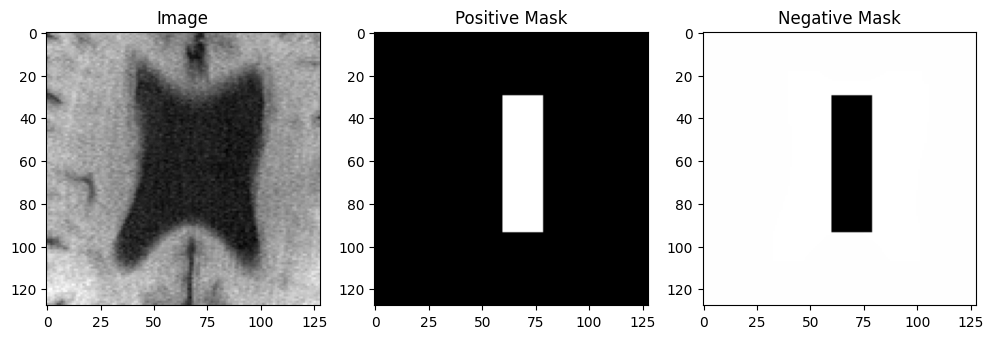

In [7]:
visualize_dataset(data_module.test_dataset)